## I. Load Data and Objectives

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
import datetime as dt

# Load data
df = pd.read_excel("./Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [153]:
df.shape

(414, 8)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Column "No" is index, so remove this one keep index

In [155]:
df.drop(columns=["No"], inplace=True)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [156]:
Convert X1 from Float to Timeframe

12

our hypothesis is 2013.500 is June/2013

In [157]:
def convert_to_datetime(years):
    year = int(years)
    month = np.rint((years - year) * 12)
    base_date = pd.to_datetime(f"{year}")
    return base_date + pd.DateOffset(months=month)


df["X1 transaction date"] = df["X1 transaction date"].apply(convert_to_datetime)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-11-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-11-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-07-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-06-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-10-01,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2012-12-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-08-01,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-03-01,18.8,390.96960,7,24.97923,121.53986,40.6
412,2012-12-01,8.1,104.81010,5,24.96674,121.54067,52.5


We know that the hypothesis is that 2013.500 is June/2013

Thus, we check our code

In [158]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Duplicated?

In [159]:
df.duplicated().sum()

0

Boxplot to see outliers

Dist. plot and Boxplot of data

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")


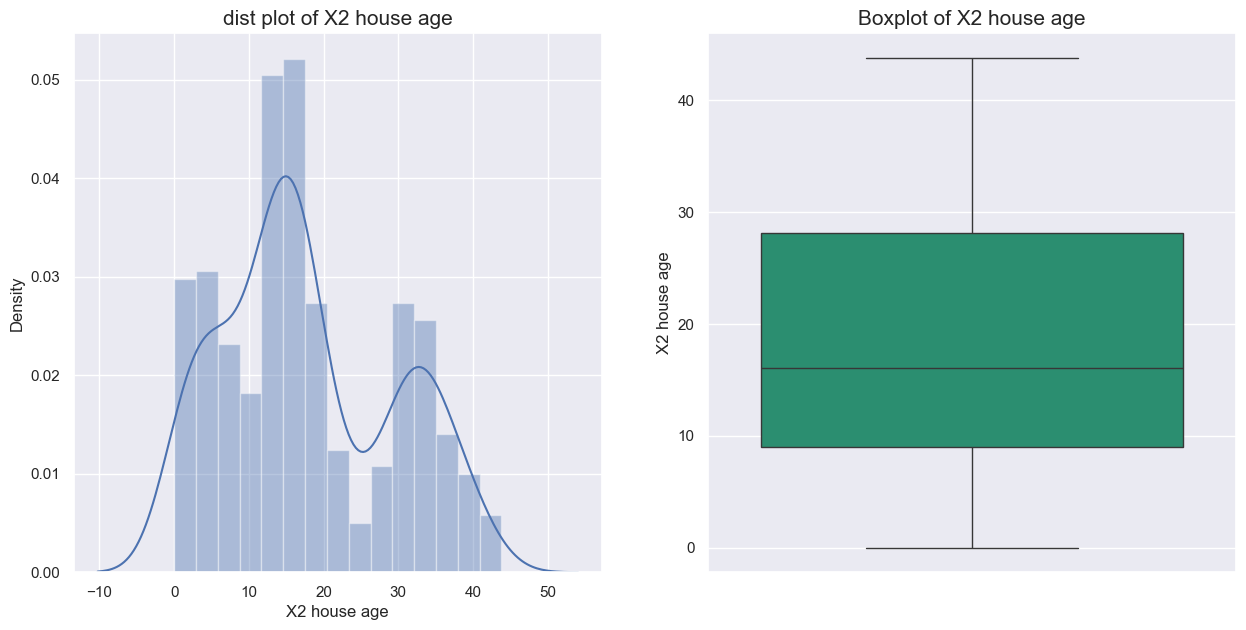

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")


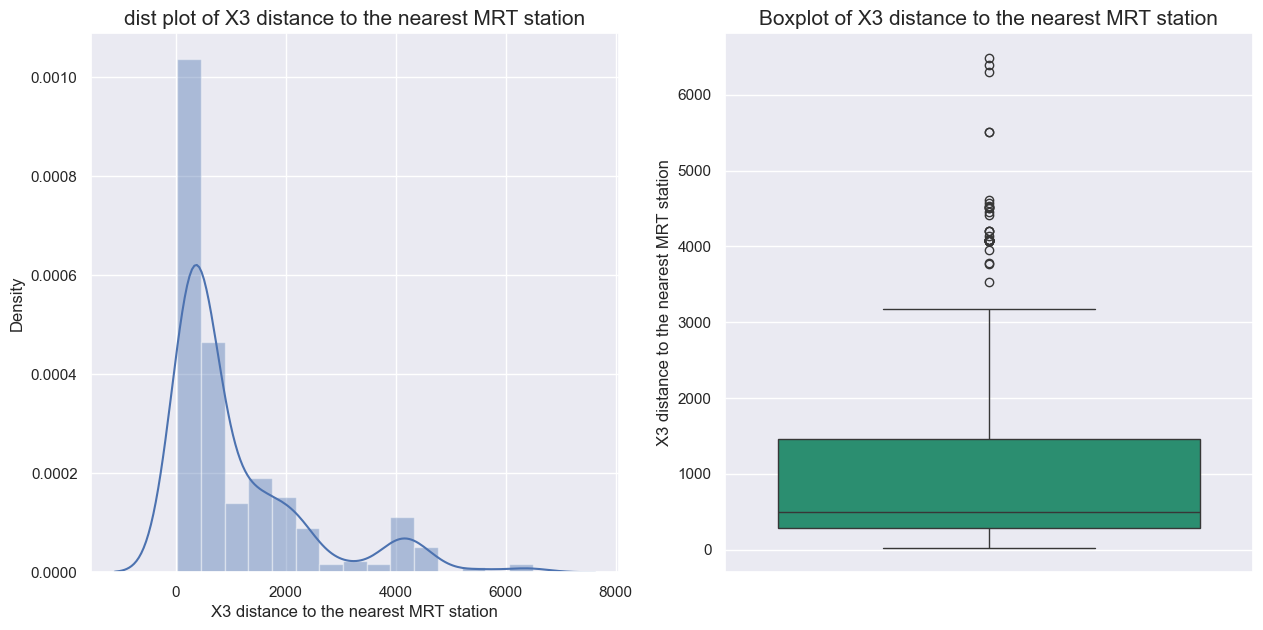

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")


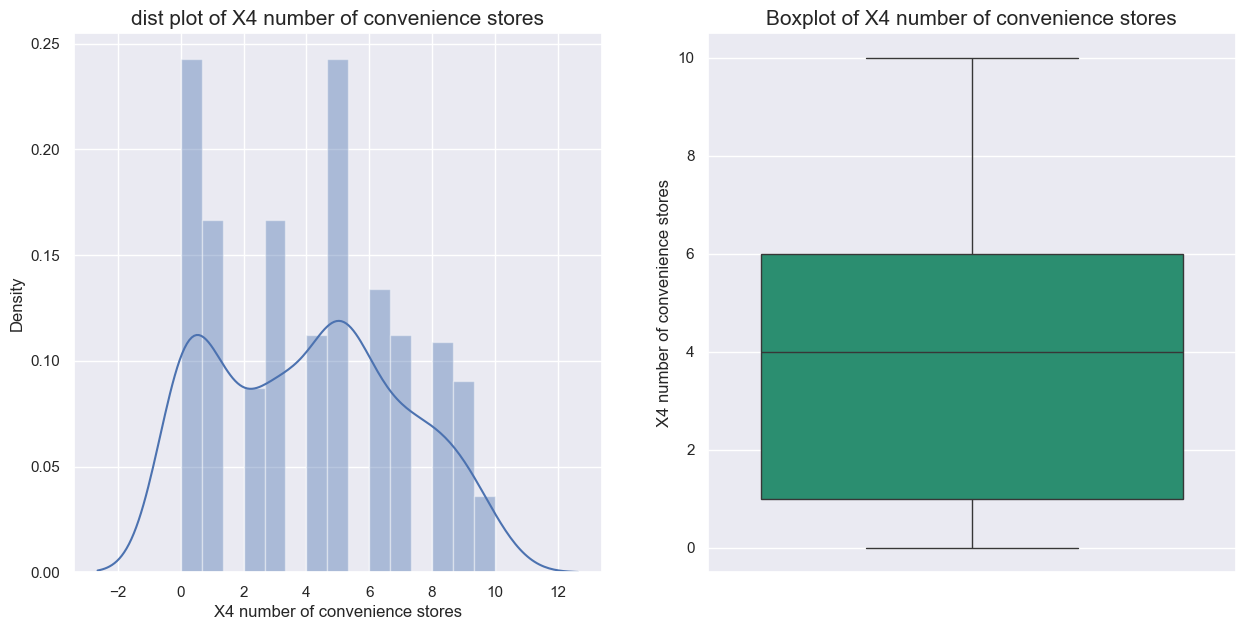

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")


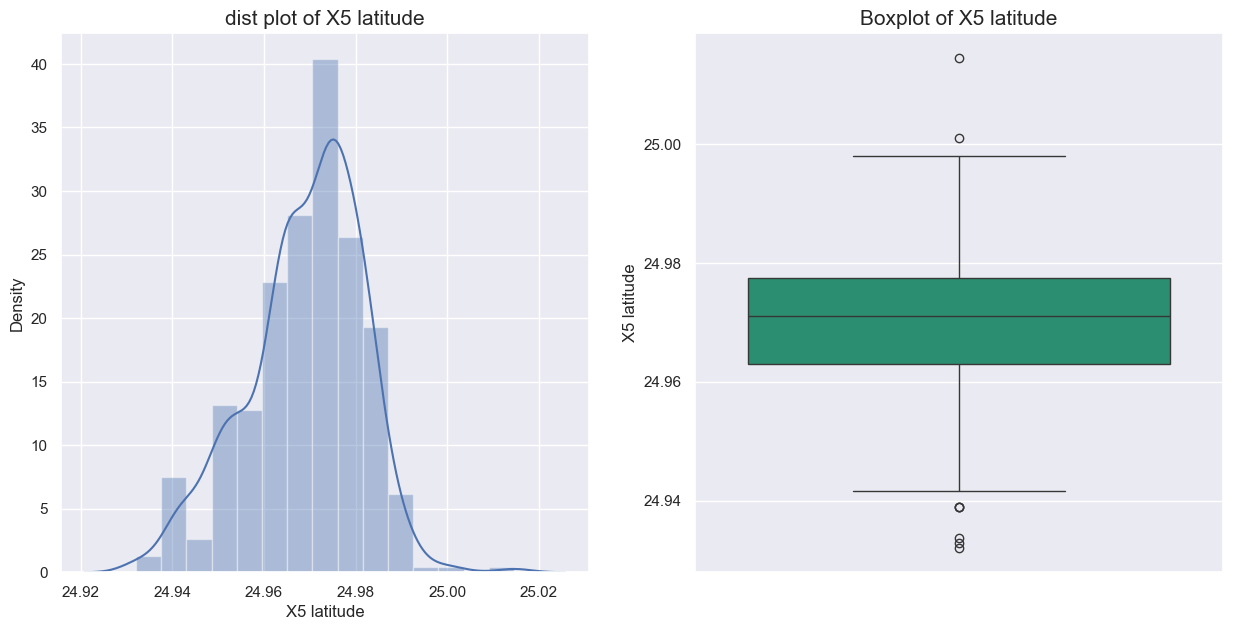

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")


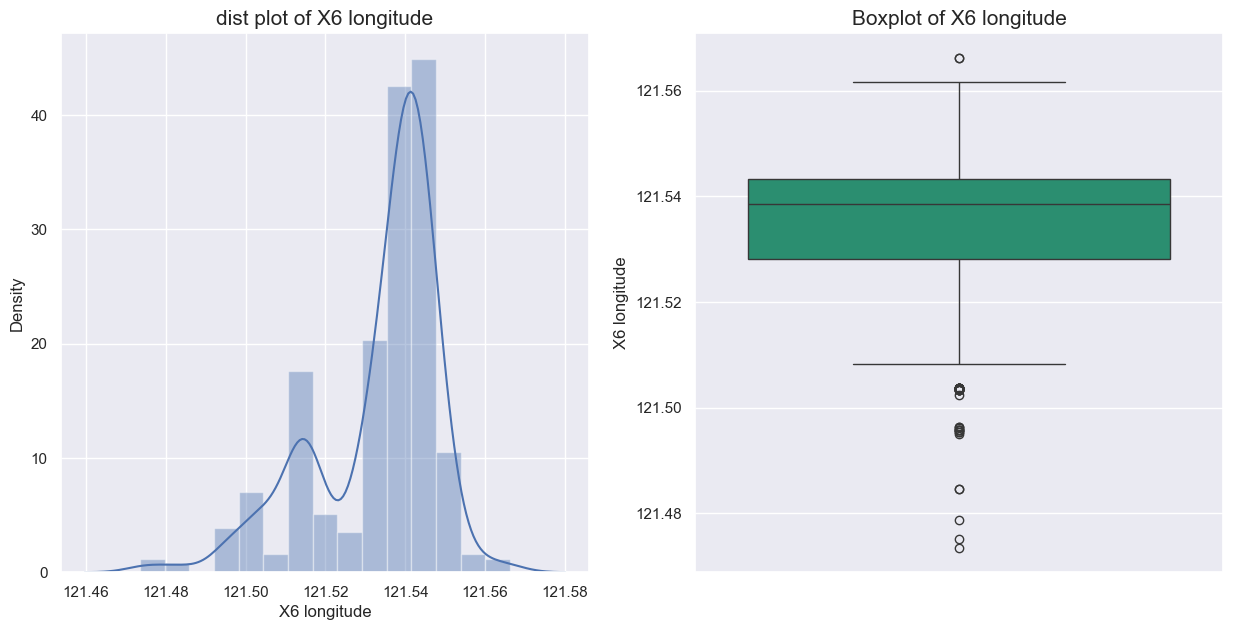

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\3756497322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")


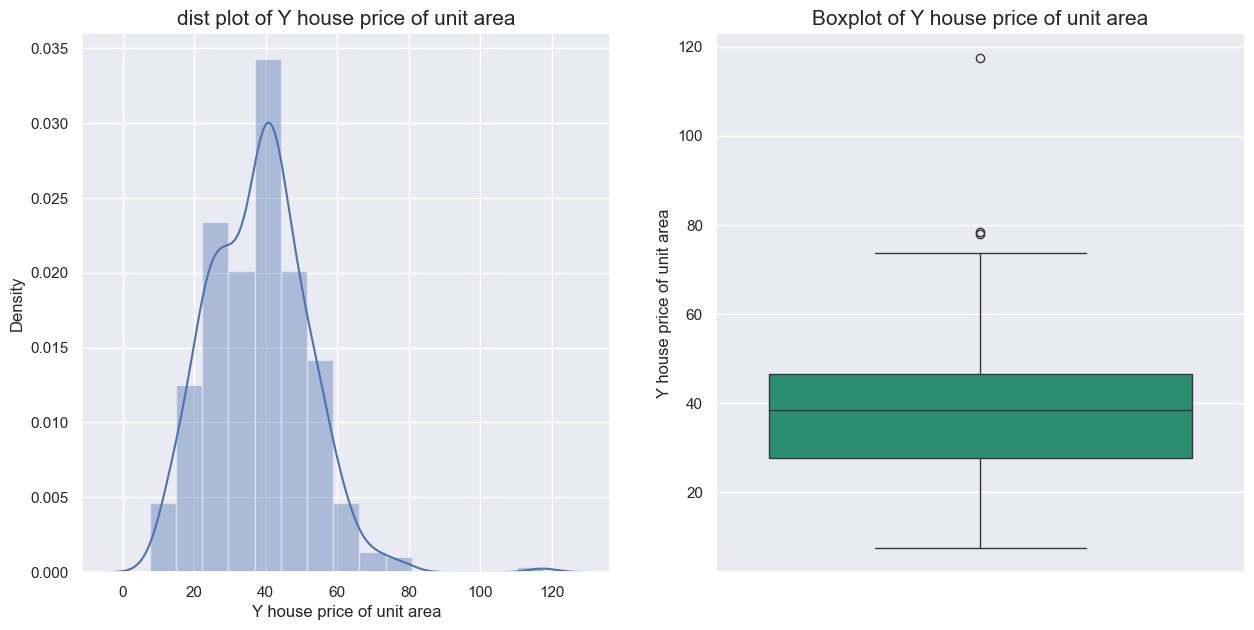

In [160]:
for column in df.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.title("dist plot of " + column, fontsize=15)
    sns.distplot(df[column], bins=15)
    plt.subplot(1, 2, 2)
    plt.title("Boxplot of " + column, fontsize=15)
    sns.boxplot(data=df[column], palette="Dark2")
    plt.show()

In [161]:
df_capped = df.copy()

Deal with outliers by capping data

In [162]:
for column in df_capped.select_dtypes(include="number").columns.tolist():
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    max_limit = Q3 + (1.5 * IQR)
    min_limit = Q1 - (1.5 * IQR)
    df_capped[column] = pd.DataFrame(
        np.where(
            df_capped[column] > max_limit,
            max_limit,
            (np.where(df_capped[column] < min_limit, min_limit, df_capped[column])),
        ),
        columns=[column],
    )

Dist. plot and Boxplot of data after capped

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")


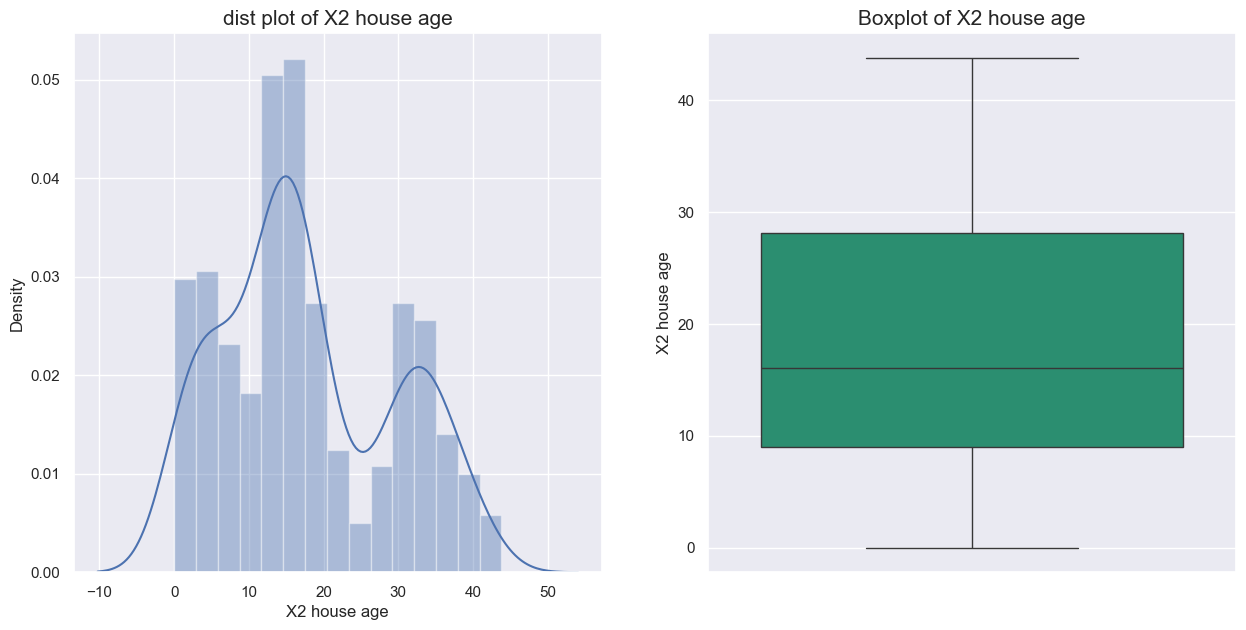

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")


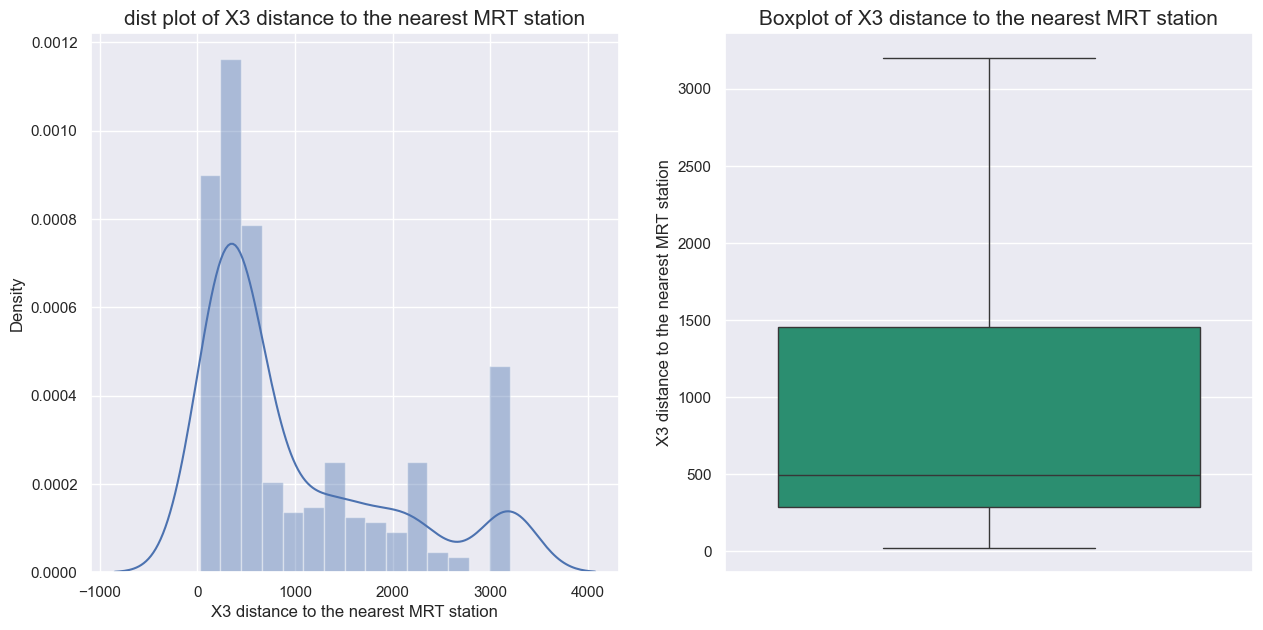

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")


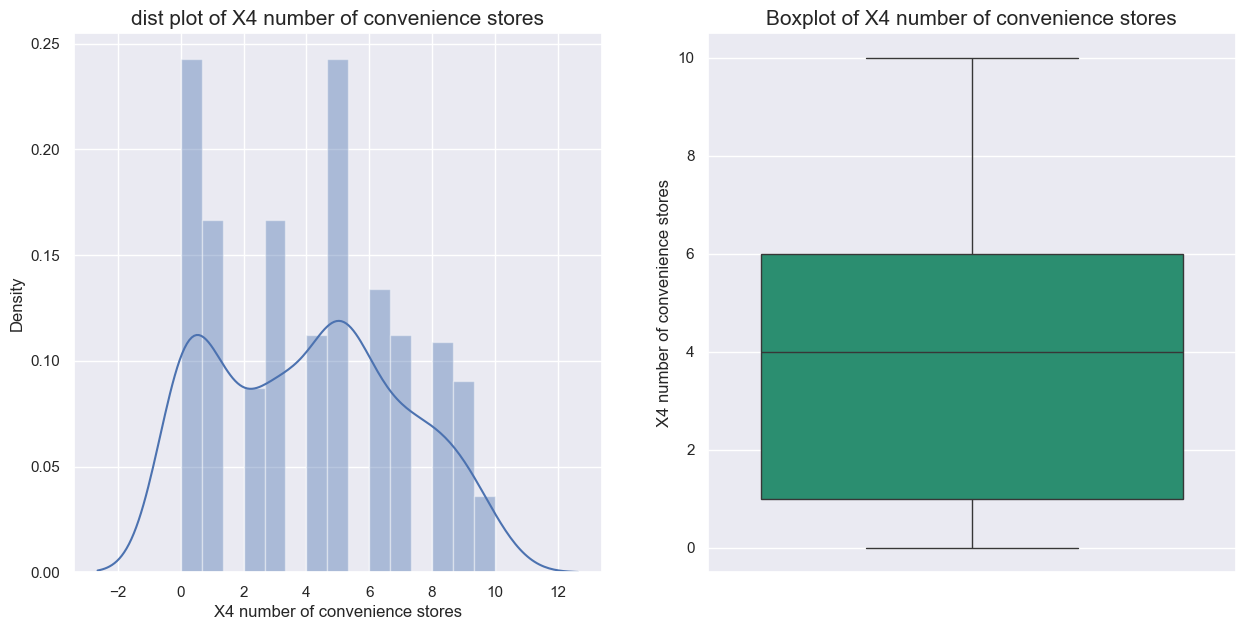

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")


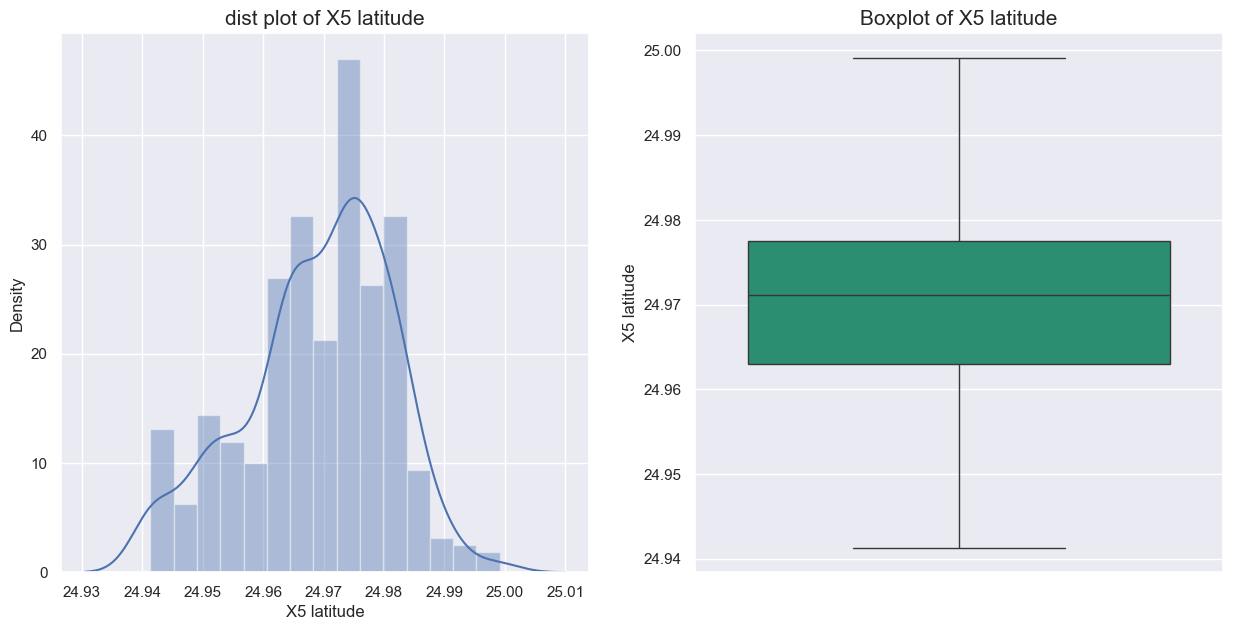

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")


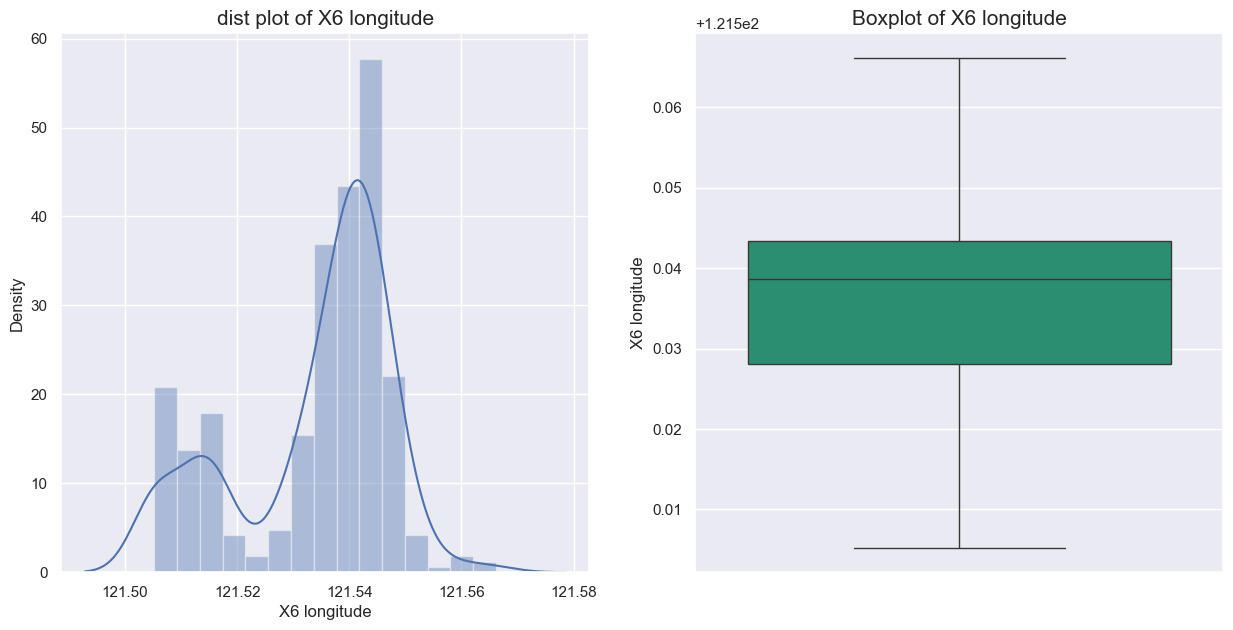

C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_capped[column], bins=15)
C:\Users\Hort\AppData\Local\Temp\ipykernel_13836\730944305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")


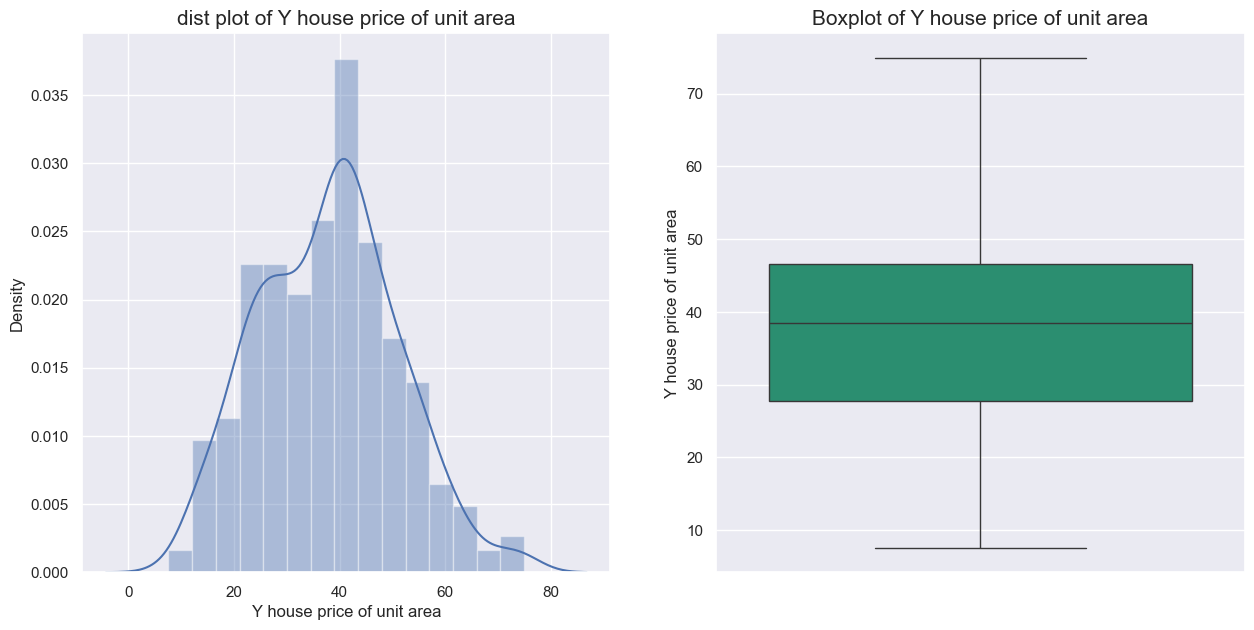

In [163]:
for column in df_capped.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.title("dist plot of " + column, fontsize=15)
    sns.distplot(df_capped[column], bins=15)
    plt.subplot(1, 2, 2)
    plt.title("Boxplot of " + column, fontsize=15)
    sns.boxplot(data=df_capped[column], palette="Dark2")
    plt.show()

EDA and Data visualization

In [164]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-01-24 02:50:26.086956544,2012-08-01 00:00:00,2012-11-01 00:00:00,2013-02-01 00:00:00,2013-05-01 00:00:00,2013-07-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,1083.885689,23.38284,289.3248,492.2313,1454.279,6488.021,1262.109595
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.96903,24.93207,24.963,24.9711,24.977455,25.01459,0.01241
X6 longitude,414.0,121.533361,121.47353,121.528085,121.53863,121.543305,121.56627,0.015347
Y house price of unit area,414.0,37.980193,7.6,27.7,38.45,46.6,117.5,13.606488


In [165]:
df_capped.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-01-24 02:50:26.086956544,2012-08-01 00:00:00,2012-11-01 00:00:00,2013-02-01 00:00:00,2013-05-01 00:00:00,2013-07-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,974.545851,23.38284,289.3248,492.2313,1454.279,3201.7103,968.915855
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.969067,24.941318,24.963,24.9711,24.977455,24.999137,0.01208
X6 longitude,414.0,121.533974,121.505255,121.528085,121.53863,121.543305,121.566135,0.013779
Y house price of unit area,414.0,37.861957,7.6,27.7,38.45,46.6,74.95,13.112035


In [166]:
Average House Price of unit area: 37.86

Cheapest House Price of unit area: 7.6

Largest House Price of unit area: 27.7

X1 transaction date
2013-06-01    58
2013-07-01    47
2013-02-01    46
2012-12-01    38
2013-04-01    32
2012-11-01    31
2012-09-01    30
2013-05-01    29
2013-01-01    28
2012-10-01    27
2013-03-01    25
2013-08-01    23
Name: count, dtype: int64

Data Visualization: mainly use histogram

[Text(0, 0, '30'),
 Text(0, 0, '27'),
 Text(0, 0, '31'),
 Text(0, 0, '38'),
 Text(0, 0, '28'),
 Text(0, 0, '46'),
 Text(0, 0, '25'),
 Text(0, 0, '32'),
 Text(0, 0, '29'),
 Text(0, 0, '58'),
 Text(0, 0, '47'),
 Text(0, 0, '23')]

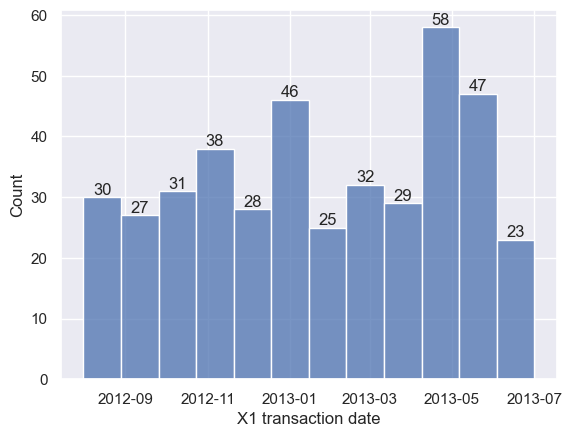

In [167]:
ax1 = sns.histplot(df_capped["X1 transaction date"], bins=12, kde=False)
ax1.bar_label(
    ax1.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

In [168]:
df_capped["X2 house age"].max()

43.8

[Text(0, 0, '117'), Text(0, 0, '174'), Text(0, 0, '64'), Text(0, 0, '59')]

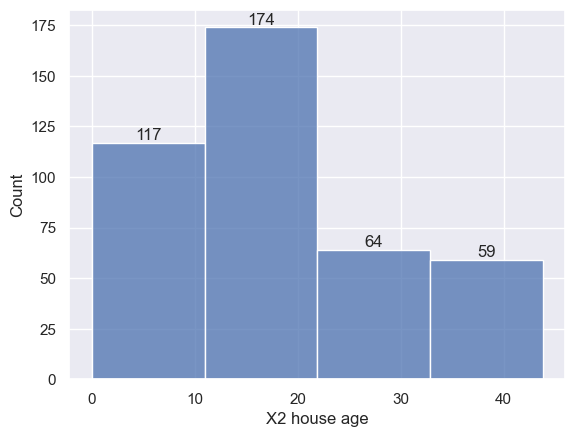

In [169]:
ax2 = sns.histplot(df_capped["X2 house age"], bins=4)
ax2.bar_label(
    ax2.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

[Text(0, 0, '224'),
 Text(0, 0, '56'),
 Text(0, 0, '39'),
 Text(0, 0, '25'),
 Text(0, 0, '27'),
 Text(0, 0, '43')]

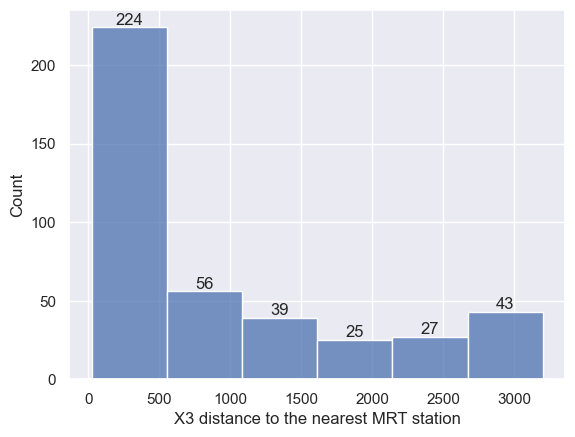

In [170]:
ax3 = sns.histplot(df_capped["X3 distance to the nearest MRT station"], bins=6)
ax3.bar_label(
    ax3.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

[Text(0, 0, '113'),
 Text(0, 0, '70'),
 Text(0, 0, '98'),
 Text(0, 0, '68'),
 Text(0, 0, '65')]

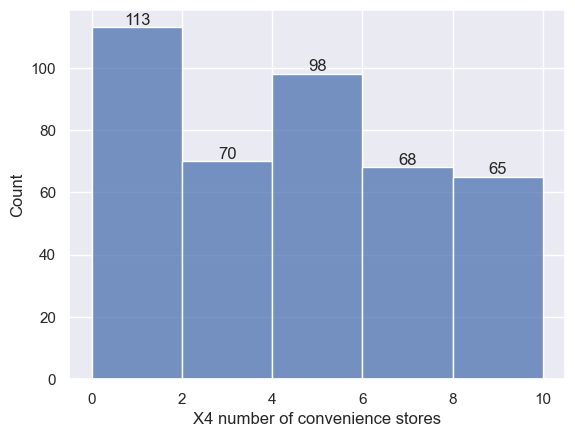

In [171]:
ax4 = sns.histplot(df_capped["X4 number of convenience stores"], bins=5)
ax4.bar_label(
    ax4.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

[Text(0, 0, '42'),
 Text(0, 0, '122'),
 Text(0, 0, '163'),
 Text(0, 0, '70'),
 Text(0, 0, '17')]

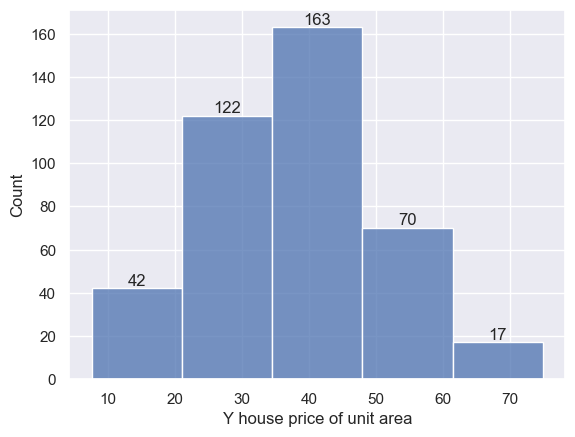

In [172]:
ay = sns.histplot(df_capped["Y house price of unit area"], bins=5)
ay.bar_label(
    ay.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

Text(0, 0.5, 'House Price of unit area')

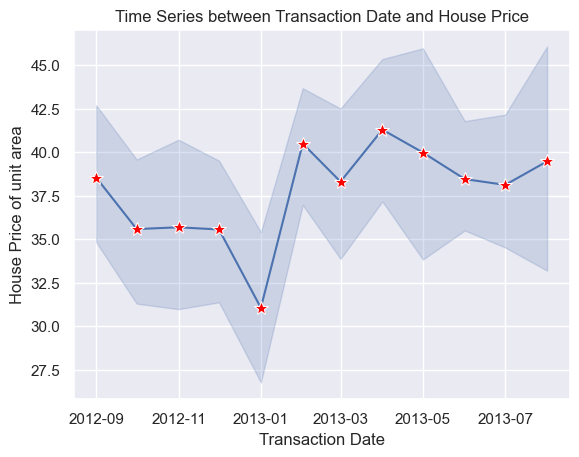

In [173]:
timeseres_x1_y = sns.lineplot(
    x=df_capped["X1 transaction date"],
    y=df_capped["Y house price of unit area"],
    marker="*",
    markerfacecolor="Red",
    markersize=10,
)
timeseres_x1_y.set_title(label="Time Series between Transaction Date and House Price")
timeseres_x1_y.set_xlabel(xlabel="Transaction Date")
timeseres_x1_y.set_ylabel(ylabel="House Price of unit area")

In [174]:
df_capped[["X1 transaction date"]] = df_capped[["X1 transaction date"]].astype(
    "category"
)

In [175]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   X1 transaction date                     414 non-null    datetime64[ns]
 1   X2 house age                            414 non-null    float64       
 2   X3 distance to the nearest MRT station  414 non-null    float64       
 3   X4 number of convenience stores         414 non-null    float64       
 4   X5 latitude                             414 non-null    float64       
 5   X6 longitude                            414 non-null    float64       
 6   Y house price of unit area              414 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


<Axes: xlabel='count', ylabel='X1 transaction date'>

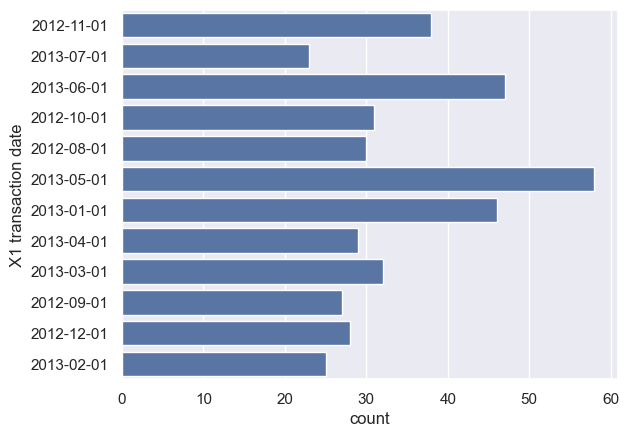

In [176]:
sns.countplot(df_capped["X1 transaction date"])

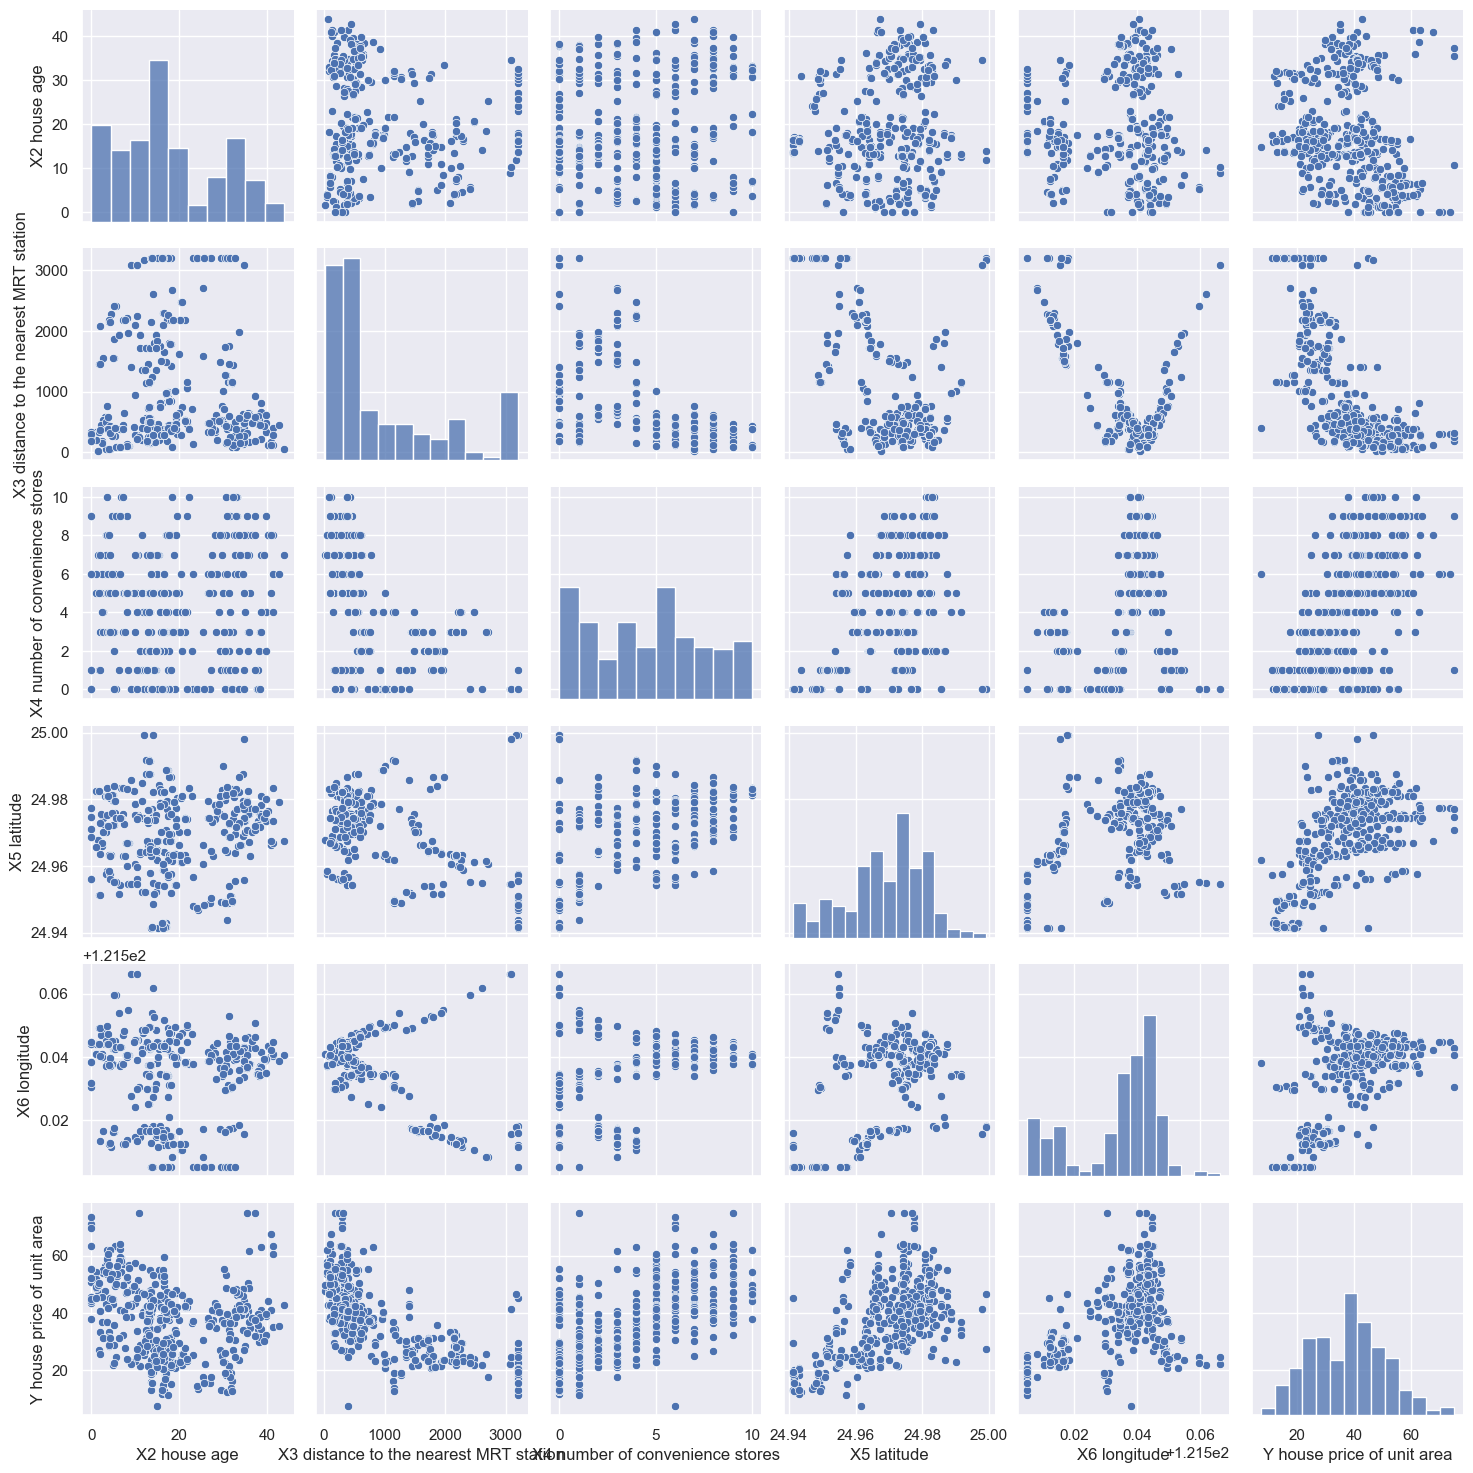

In [177]:
sns.pairplot(df_capped)

<Axes: >

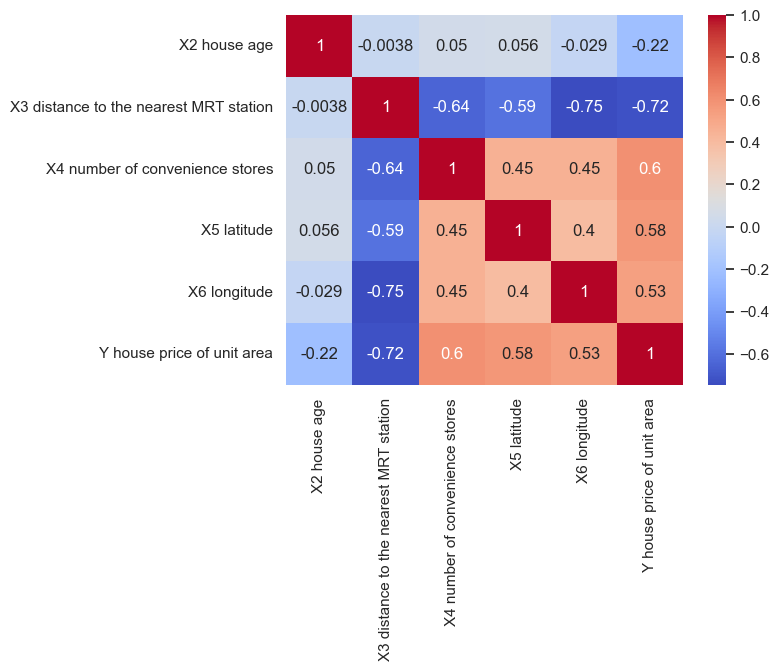

In [178]:
cr = df_capped.corr(numeric_only=True)
sns.heatmap(cr, annot=True, cmap="coolwarm")

Text(0.5, 1.0, 'heatmap of X1 and Y')

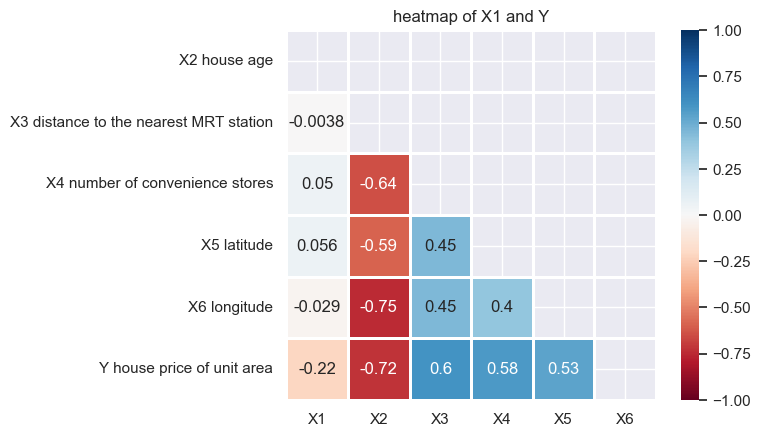

In [179]:
# df_capped.drop(columns=["X5 latitude","X6 longitude"], inplace=True)

In [180]:
df_capped.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-12-01,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012-12-01,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013-07-01,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012-11-01,5.0,390.56840,5.0,24.97937,121.54245,43.1


In [181]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

data_x = df_capped.iloc[:, 1:-1]
data_y = df_capped.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=21, shuffle=True
)
LR = linear_model.LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [182]:
import statsmodels.api as sm

LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
y_train_pred = LR.predict(x_train)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.659
Model:                                    OLS   Adj. R-squared:                  0.653
Method:                         Least Squares   F-statistic:                     125.4
Date:                        Sat, 10 Feb 2024   Prob (F-statistic):           1.23e-73
Time:                                11:39:36   Log-Likelihood:                -1131.7
No. Observations:                         331   AIC:                             2275.
Df Residuals:                             325   BIC:                             2298.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [183]:
x_test = sm.add_constant(x_test)
model1 = sm.OLS(y_test, x_test).fit()
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.604
Model:                                    OLS   Adj. R-squared:                  0.578
Method:                         Least Squares   F-statistic:                     23.46
Date:                        Sat, 10 Feb 2024   Prob (F-statistic):           3.03e-14
Time:                                11:39:36   Log-Likelihood:                -302.74
No. Observations:                          83   AIC:                             617.5
Df Residuals:                              77   BIC:                             632.0
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Regression Plot 

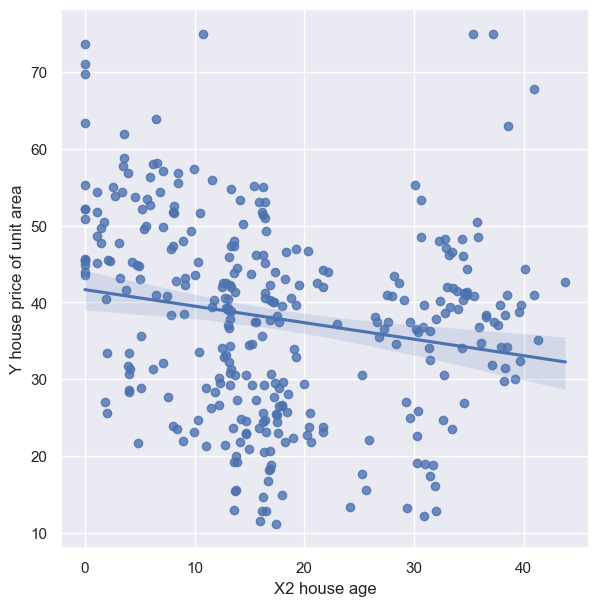

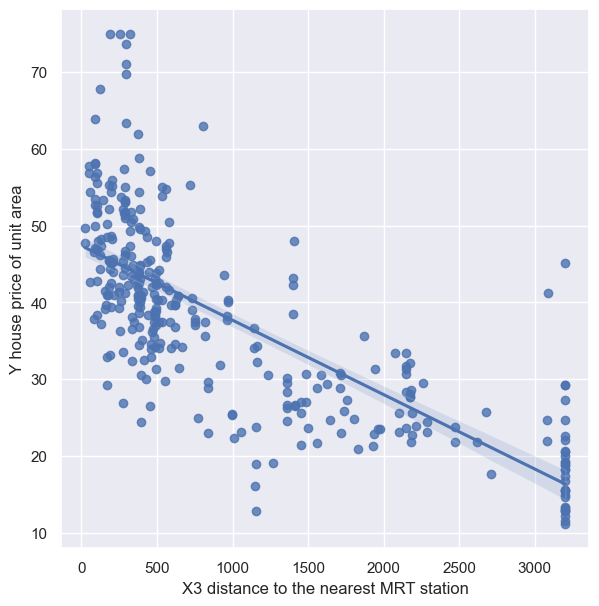

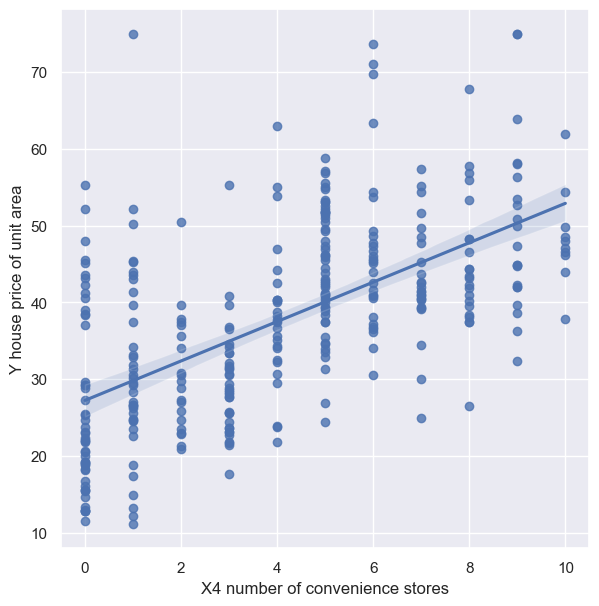

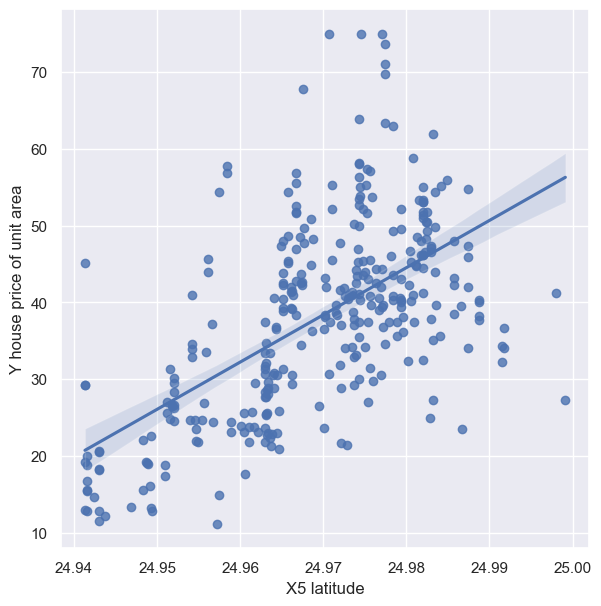

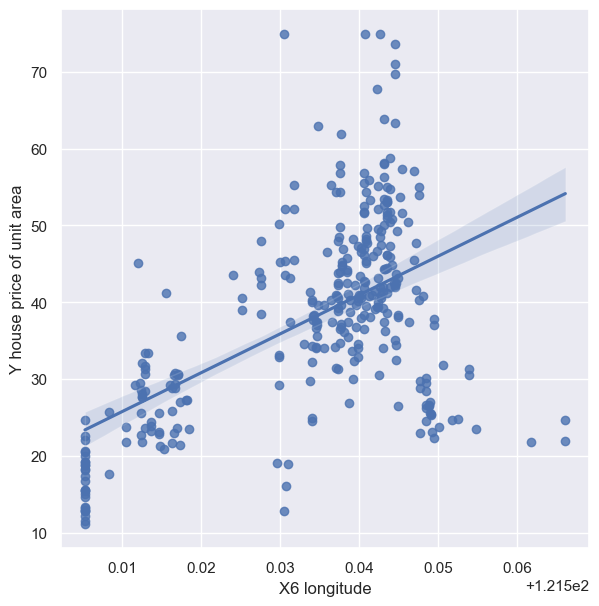

In [184]:
for column in data_x.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    sns.regplot(x=x_train[column], y=y_train)
    plt.show()

In [185]:
LR.intercept_

-4408.687043716608

In [186]:
LR.coef_

array([-2.59276008e-01, -6.49647956e-03,  8.21364990e-01,  2.27983355e+02,
       -1.01901510e+01])

# XG boost

XGboost builds cycles that repeatedly builds new models and combines them into an ensemble model. It is started by calculating the errors for each observation in the dataset. And build model to predict those. Add the predictions of error into the ensemble model.

In [187]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import asarray

In [188]:
# train_dmatrix = xg.DMatrix(data = x_train, label = y_train) 
# test_dmatrix = xg.DMatrix(data = x_test, label = y_test) 

In [189]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=21, shuffle=True
)

In [190]:
xgb_r = xg.XGBRegressor(
    objective="reg:linear",
    n_estimators=1000,
    learning_rate=0.01,
    n_jobs=4,
    seed=123,
    eval_metric="rmse",
    # early_stopping_rounds=10,
    max_depth=7,
    subsample=0.7,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=1,
    reg_lambda=1,
    # booster="gblinear",
    # num_boost_round=10,
)

In [191]:
dir(xgb_r)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_estimator_type',
 '_get_default_requests',
 '_get_iteration_range',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_load_model_attributes',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'base_score',
 'best_iteration',
 'best_score',
 'booster

In [192]:
xgb_r.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    verbose=False,
)

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:39:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, objective='reg:linear', ...)

In [193]:
pred = xgb_r.predict(x_test)

In [194]:
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" % (rmse))

RMSE :  7.259121


In [195]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=21)
scores = cross_val_score(
    xgb_r, data_x, data_y, scoring="neg_root_mean_squared_error", cv=cv,verbose=False
)
scores = absolute(scores)
print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:39:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:39:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:39:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\r

Mean RMSE: 6.898 (1.115)


In [196]:
# row = [500,3,25]
# new_data = asarray([row])
# y_hat = xgb_r.predict(new_data)
# print('Predicted: %.2f' % y_hat)

In [197]:
# row = [100,5,24.983]
# new_data = asarray([row])
# y_hat = xgb_r.predict(new_data)
# print('Predicted: %.2f' % y_hat)

In [198]:
from xgboost import cv

data_dmatrix = xg.DMatrix(data=data_x, label=data_y)
params = {
    "objective": "reg:linear",
    "colsample_bytree": 0.3,
    "learning_rate": 0.1,
    "max_depth": 5,
    "alpha": 10,
}

xgb_cv = cv(
    dtrain=data_dmatrix,
    params=params,
    nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="rmse",
    as_pandas=True,
    seed=123,
)

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:39:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [199]:
xgb_cv.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,12.239825,0.245659,12.311906,0.532684
1,11.833804,0.219196,12.025455,0.553091
2,11.147912,0.227179,11.417387,0.541062
3,10.551302,0.235916,10.897561,0.526925
4,10.215781,0.254685,10.581749,0.552650


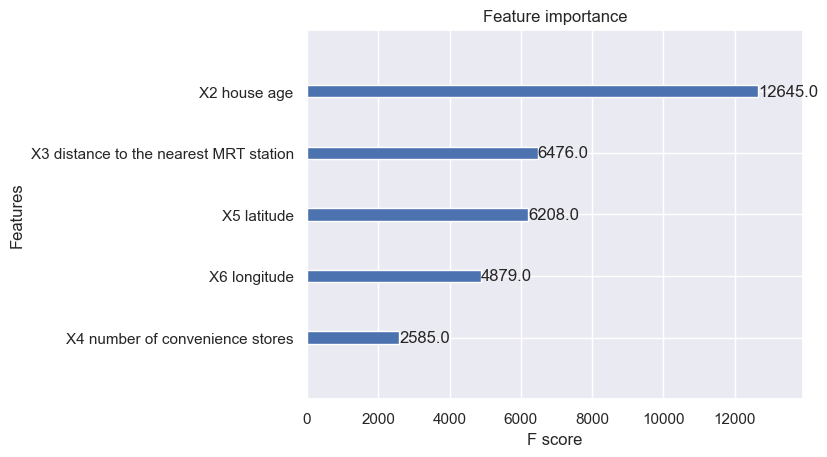

<Figure size 1600x1200 with 0 Axes>

In [200]:
xg.plot_importance(xgb_r)
plt.figure(figsize = (16, 12))
plt.show()